In [21]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from datetime import datetime


In [22]:
from tensorflow.keras.models import Model

In [91]:
import matplotlib as mpl
import os
mpl.rcParams['figure.figsize']=(18,16)
mpl.rcParams['axes.grid']=False

In [80]:
from __future__ import absolute_import, division, print_function,unicode_literals

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from keras.models import Model

In [47]:
df = pd.read_csv('C:/Users/ACER/Desktop/final2.csv')
df.head()

Date  FCnt  SpFact  RSSI  SNR  Gateway  \
0  2022-08-20 02:03:26  3743      10  -114 -1.0     1105   
1  2022-08-20 02:13:26  3744      10  -110 -8.0      146   
2  2022-08-20 02:23:26  3745      10  -113  1.0     1105   
3  2022-08-20 02:33:26  3746      10  -113 -2.2      146   
4  2022-08-20 02:53:27  3748      10  -113 -1.0     1105   

                      Payload (Hex)  AccMotion  AccX  AccY  ...  Occupancy  \
0  0100b30251070e300c00c214000f61e4        NaN   NaN   NaN  ...        NaN   
1  0100b30251070e300c00c214000f6181        NaN   NaN   NaN  ...        NaN   
2  0100b30251070e2d0c00c114000f6105        NaN   NaN   NaN  ...        NaN   
3  0100b20251070e300c00c114000f614d        NaN   NaN   NaN  ...        NaN   
4  0100b40251070e2d0c00c114000f60c0        NaN   NaN   NaN  ...        NaN   

   Pressure  Pulse1  Pulse1Abs  SoundAvg  SoundPeak  Temperature     Vdd  \
0  1008.100     NaN        NaN       NaN        NaN         17.9  3632.0   
1  1008.001     NaN        NaN       NaN        NaN         17.9  3632.0   
2  1007.877     NaN        NaN       NaN        NaN         17.9  3629.0   
3  1007.949     NaN        NaN       NaN        NaN         17.8  3632.0   
4  1007.808     NaN        NaN       NaN        NaN         18.0  3629.0   

   Waterleak  Events  
0        NaN     NaN  
1        NaN     NaN  
2        NaN     NaN  
3        NaN     NaN  
4        NaN     NaN  

[5 rows x 33 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29617 entries, 0 to 29616
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              29617 non-null  object 
 1   FCnt              29617 non-null  int64  
 2   SpFact            29617 non-null  int64  
 3   RSSI              29617 non-null  int64  
 4   SNR               29617 non-null  float64
 5   Gateway           29617 non-null  int64  
 6   Payload (Hex)     29617 non-null  object 
 7   AccMotion         0 non-null      float64
 8   AccX              0 non-null      float64
 9   AccY              0 non-null      float64
 10  AccZ              0 non-null      float64
 11  Analog1           0 non-null      float64
 12  Co2               0 non-null      float64
 13  ExternalDigital   0 non-null      float64
 14  ExternalDistance  0 non-null      float64
 15  ExternalTemp1     29615 non-null  float64
 16  Humidity          29615 non-null  float6

In [48]:
df.describe()

FCnt        SpFact          RSSI           SNR       Gateway  \
count  29617.000000  29617.000000  29617.000000  29617.000000  29617.000000   
mean    8534.603437      7.737448   -112.689874     -1.122781    929.645069   
std     5679.890075      1.059169      2.859973      4.239299    371.885542   
min        0.000000      7.000000   -124.000000    -21.000000    146.000000   
25%     3850.000000      7.000000   -115.000000     -4.000000   1105.000000   
50%     7654.000000      7.000000   -113.000000     -1.000000   1105.000000   
75%    12795.000000      9.000000   -111.000000      2.000000   1105.000000   
max    20600.000000     11.000000    -87.000000     11.000000   1792.000000   

       AccMotion  AccX  AccY  AccZ  Analog1  ...  Occupancy      Pressure  \
count        0.0   0.0   0.0   0.0      0.0  ...        0.0  29615.000000   
mean         NaN   NaN   NaN   NaN      NaN  ...        NaN   1008.147858   
std          NaN   NaN   NaN   NaN      NaN  ...        NaN     13.002553   
min          NaN   NaN   NaN   NaN      NaN  ...        NaN    967.296000   
25%          NaN   NaN   NaN   NaN      NaN  ...        NaN    998.882500   
50%          NaN   NaN   NaN   NaN      NaN  ...        NaN   1008.827000   
75%          NaN   NaN   NaN   NaN      NaN  ...        NaN   1017.033500   
max          NaN   NaN   NaN   NaN      NaN  ...        NaN   1036.731000   

       Pulse1  Pulse1Abs  SoundAvg  SoundPeak   Temperature           Vdd  \
count     0.0        0.0       0.0        0.0  29615.000000  29615.000000   
mean      NaN        NaN       NaN        NaN      4.995911   3613.537262   
std       NaN        NaN       NaN        NaN      6.604632      9.191443   
min       NaN        NaN       NaN        NaN    -14.800000   3569.000000   
25%       NaN        NaN       NaN        NaN      0.400000   3608.000000   
50%       NaN        NaN       NaN        NaN      4.400000   3613.000000   
75%       NaN        NaN       NaN        NaN     10.000000   3621.000000   
max       NaN        NaN       NaN        NaN     32.300000   3640.000000   

       Waterleak  Events  
count        0.0     0.0  
mean         NaN     NaN  
std          NaN     NaN  
min          NaN     NaN  
25%          NaN     NaN  
50%          NaN     NaN  
75%          NaN     NaN  
max          NaN     NaN  

[8 rows x 31 columns]

In [49]:
df_copy=df.copy()

In [50]:
df['Date']= pd.to_datetime(df['Date'])

In [51]:
df=df.set_index('Date')

In [52]:
df.index

DatetimeIndex(['2022-08-20 02:03:26', '2022-08-20 02:13:26',
               '2022-08-20 02:23:26', '2022-08-20 02:33:26',
               '2022-08-20 02:53:27', '2022-08-20 03:03:26',
               '2022-08-20 03:13:30', '2022-08-20 03:13:30',
               '2022-08-20 03:23:26', '2022-08-20 03:33:26',
               ...
               '2023-03-25 22:54:43', '2023-03-25 23:04:43',
               '2023-03-25 23:14:43', '2023-03-25 23:24:43',
               '2023-03-25 23:34:43', '2023-03-25 23:44:43',
               '2023-03-25 23:54:43', '2023-03-26 00:04:43',
               '2023-03-26 00:14:43', '2023-03-26 00:24:43'],
              dtype='datetime64[ns]', name='Date', length=29617, freq=None)

In [30]:
df.head()

FCnt  SpFact  RSSI  SNR  Gateway  \
Date                                                    
2022-08-20 02:03:26  3743      10  -114 -1.0     1105   
2022-08-20 02:13:26  3744      10  -110 -8.0      146   
2022-08-20 02:23:26  3745      10  -113  1.0     1105   
2022-08-20 02:33:26  3746      10  -113 -2.2      146   
2022-08-20 02:53:27  3748      10  -113 -1.0     1105   

                                        Payload (Hex)  AccMotion  AccX  AccY  \
Date                                                                           
2022-08-20 02:03:26  0100b30251070e300c00c214000f61e4        NaN   NaN   NaN   
2022-08-20 02:13:26  0100b30251070e300c00c214000f6181        NaN   NaN   NaN   
2022-08-20 02:23:26  0100b30251070e2d0c00c114000f6105        NaN   NaN   NaN   
2022-08-20 02:33:26  0100b20251070e300c00c114000f614d        NaN   NaN   NaN   
2022-08-20 02:53:27  0100b40251070e2d0c00c114000f60c0        NaN   NaN   NaN   

                     AccZ  ...  Occupancy  Pressure  Pulse1  Pulse1Abs  \
Date                       ...                                           
2022-08-20 02:03:26   NaN  ...        NaN  1008.100     NaN        NaN   
2022-08-20 02:13:26   NaN  ...        NaN  1008.001     NaN        NaN   
2022-08-20 02:23:26   NaN  ...        NaN  1007.877     NaN        NaN   
2022-08-20 02:33:26   NaN  ...        NaN  1007.949     NaN        NaN   
2022-08-20 02:53:27   NaN  ...        NaN  1007.808     NaN        NaN   

                     SoundAvg  SoundPeak  Temperature     Vdd  Waterleak  \
Date                                                                       
2022-08-20 02:03:26       NaN        NaN         17.9  3632.0        NaN   
2022-08-20 02:13:26       NaN        NaN         17.9  3632.0        NaN   
2022-08-20 02:23:26       NaN        NaN         17.9  3629.0        NaN   
2022-08-20 02:33:26       NaN        NaN         17.8  3632.0        NaN   
2022-08-20 02:53:27       NaN        NaN         18.0  3629.0        NaN   

                     Events  
Date                         
2022-08-20 02:03:26     NaN  
2022-08-20 02:13:26     NaN  
2022-08-20 02:23:26     NaN  
2022-08-20 02:33:26     NaN  
2022-08-20 02:53:27     NaN  

[5 rows x 32 columns]

In [93]:
df.isnull().values.any()

True

In [94]:
df.isnull().sum()

FCnt                    0
SpFact                  0
RSSI                    0
SNR                     0
Gateway                 0
Payload (Hex)           0
AccMotion           29617
AccX                29617
AccY                29617
AccZ                29617
Analog1             29617
Co2                 29617
ExternalDigital     29617
ExternalDistance    29617
ExternalTemp1           2
Humidity                2
IrExternalTemp      29617
IrInternalTemp      29617
Latitude            29617
Light               29617
Longitude           29617
Motion              29617
Occupancy           29617
Pressure                2
Pulse1              29617
Pulse1Abs           29617
SoundAvg            29617
SoundPeak           29617
Temperature             2
Vdd                     2
Waterleak           29617
Events              29617
dtype: int64

In [32]:
df.loc['2022-08-21':'2022-09-21']

C:\Users\ACER\AppData\Local\Temp\ipykernel_13084\300602768.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df.loc['2022-08-21':'2022-09-21']


FCnt  SpFact  RSSI  SNR  Gateway  \
Date                                                    
2022-08-21 00:03:23  3875       9  -116 -7.0     1105   
2022-08-21 00:13:23  3876       9  -113 -2.0     1105   
2022-08-21 00:23:23  3877       9  -115 -5.0     1105   
2022-08-21 00:33:22  3878       9  -114 -3.0     1105   
2022-08-21 00:43:22  3879       9  -114 -2.0     1105   
...                   ...     ...   ...  ...      ...   
2022-09-21 23:11:18  8478       9  -114  0.0     1105   
2022-09-21 23:21:18  8479       9  -115 -4.0     1105   
2022-09-21 23:31:18  8480       9  -114 -5.0     1105   
2022-09-21 23:41:21  8481       9  -115  0.0     1105   
2022-09-21 23:51:21  8482       9  -115 -1.0     1105   

                                        Payload (Hex)  AccMotion  AccX  AccY  \
Date                                                                           
2022-08-21 00:03:23  010089024f070e2b0c00ab14000f6d8a        NaN   NaN   NaN   
2022-08-21 00:13:23  010087024f070e2d0c00aa14000f6ddd        NaN   NaN   NaN   
2022-08-21 00:23:23  010086024f070e2d0c00a914000f6d60        NaN   NaN   NaN   
2022-08-21 00:33:22  010085024f070e2d0c00a814000f6db6        NaN   NaN   NaN   
2022-08-21 00:43:22  010084024f070e2d0c00a714000f6d7f        NaN   NaN   NaN   
...                                               ...        ...   ...   ...   
2022-09-21 23:11:18  01003a024d070e250c005314000f961c        NaN   NaN   NaN   
2022-09-21 23:21:18  010039024d070e250c005314000f9621        NaN   NaN   NaN   
2022-09-21 23:31:18  010038024d070e230c005114000f95fd        NaN   NaN   NaN   
2022-09-21 23:41:21  010037024d070e200c005114000f958b        NaN   NaN   NaN   
2022-09-21 23:51:21  010037024d070e200c005014000f95ab        NaN   NaN   NaN   

                     AccZ  ...  Occupancy  Pressure  Pulse1  Pulse1Abs  \
Date                       ...                                           
2022-08-21 00:03:23   NaN  ...        NaN  1011.082     NaN        NaN   
2022-08-21 00:13:23   NaN  ...        NaN  1011.165     NaN        NaN   
2022-08-21 00:23:23   NaN  ...        NaN  1011.040     NaN        NaN   
2022-08-21 00:33:22   NaN  ...        NaN  1011.126     NaN        NaN   
2022-08-21 00:43:22   NaN  ...        NaN  1011.071     NaN        NaN   
...                   ...  ...        ...       ...     ...        ...   
2022-09-21 23:11:18   NaN  ...        NaN  1021.468     NaN        NaN   
2022-09-21 23:21:18   NaN  ...        NaN  1021.473     NaN        NaN   
2022-09-21 23:31:18   NaN  ...        NaN  1021.437     NaN        NaN   
2022-09-21 23:41:21   NaN  ...        NaN  1021.323     NaN        NaN   
2022-09-21 23:51:21   NaN  ...        NaN  1021.355     NaN        NaN   

                     SoundAvg  SoundPeak  Temperature     Vdd  Waterleak  \
Date                                                                       
2022-08-21 00:03:23       NaN        NaN         13.7  3627.0        NaN   
2022-08-21 00:13:23       NaN        NaN         13.5  3629.0        NaN   
2022-08-21 00:23:23       NaN        NaN         13.4  3629.0        NaN   
2022-08-21 00:33:22       NaN        NaN         13.3  3629.0        NaN   
2022-08-21 00:43:22       NaN        NaN         13.2  3629.0        NaN   
...                       ...        ...          ...     ...        ...   
2022-09-21 23:11:18       NaN        NaN          5.8  3621.0        NaN   
2022-09-21 23:21:18       NaN        NaN          5.7  3621.0        NaN   
2022-09-21 23:31:18       NaN        NaN          5.6  3619.0        NaN   
2022-09-21 23:41:21       NaN        NaN          5.5  3616.0        NaN   
2022-09-21 23:51:21       NaN        NaN          5.5  3616.0        NaN   

                     Events  
Date                         
2022-08-21 00:03:23     NaN  
2022-08-21 00:13:23     NaN  
2022-08-21 00:23:23     NaN  
2022-08-21 00:33:22     NaN  
2022-08-21 00:43:22     NaN  
...                     ...  
2022-09-21 23:11:18     NaN  
2022-09-21 23:21

In [33]:
df.loc['2022':'2023']

C:\Users\ACER\AppData\Local\Temp\ipykernel_13084\2405299139.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df.loc['2022':'2023']


FCnt  SpFact  RSSI  SNR  Gateway  \
Date                                                    
2022-08-20 02:03:26  3743      10  -114 -1.0     1105   
2022-08-20 02:13:26  3744      10  -110 -8.0      146   
2022-08-20 02:23:26  3745      10  -113  1.0     1105   
2022-08-20 02:33:26  3746      10  -113 -2.2      146   
2022-08-20 02:53:27  3748      10  -113 -1.0     1105   
...                   ...     ...   ...  ...      ...   
2023-03-25 23:44:43  4128       7  -114  1.0     1105   
2023-03-25 23:54:43  4129       7  -111  2.2      146   
2023-03-26 00:04:43  4130       7  -113  0.0     1105   
2023-03-26 00:14:43  4131       7  -114  0.0     1105   
2023-03-26 00:24:43  4132       7  -105 -8.0     1105   

                                        Payload (Hex)  AccMotion  AccX  AccY  \
Date                                                                           
2022-08-20 02:03:26  0100b30251070e300c00c214000f61e4        NaN   NaN   NaN   
2022-08-20 02:13:26  0100b30251070e300c00c214000f6181        NaN   NaN   NaN   
2022-08-20 02:23:26  0100b30251070e2d0c00c114000f6105        NaN   NaN   NaN   
2022-08-20 02:33:26  0100b20251070e300c00c114000f614d        NaN   NaN   NaN   
2022-08-20 02:53:27  0100b40251070e2d0c00c114000f60c0        NaN   NaN   NaN   
...                                               ...        ...   ...   ...   
2023-03-25 23:44:43  01fffe025c070e1b0c000014000f2869        NaN   NaN   NaN   
2023-03-25 23:54:43  01fffe025c070e1d0c000014000f28bf        NaN   NaN   NaN   
2023-03-26 00:04:43  01fffe025c070e1d0c000014000f286e        NaN   NaN   NaN   
2023-03-26 00:14:43  01fffd025c070e1b0c000014000f28ce        NaN   NaN   NaN   
2023-03-26 00:24:43  01fffe025c070e1b0c000014000f28c5        NaN   NaN   NaN   

                     AccZ  ...  Occupancy  Pressure  Pulse1  Pulse1Abs  \
Date                       ...                                           
2022-08-20 02:03:26   NaN  ...        NaN  1008.100     NaN        NaN   
2022-08-20 02:13:26   NaN  ...        NaN  1008.001     NaN        NaN   
2022-08-20 02:23:26   NaN  ...        NaN  1007.877     NaN        NaN   
2022-08-20 02:33:26   NaN  ...        NaN  1007.949     NaN        NaN   
2022-08-20 02:53:27   NaN  ...        NaN  1007.808     NaN        NaN   
...                   ...  ...        ...       ...     ...        ...   
2023-03-25 23:44:43   NaN  ...        NaN   993.385     NaN        NaN   
2023-03-25 23:54:43   NaN  ...        NaN   993.471     NaN        NaN   
2023-03-26 00:04:43   NaN  ...        NaN   993.390     NaN        NaN   
2023-03-26 00:14:43   NaN  ...        NaN   993.486     NaN        NaN   
2023-03-26 00:24:43   NaN  ...        NaN   993.477     NaN        NaN   

                     SoundAvg  SoundPeak  Temperature     Vdd  Waterleak  \
Date                                                                       
2022-08-20 02:03:26       NaN        NaN         17.9  3632.0        NaN   
2022-08-20 02:13:26       NaN        NaN         17.9  3632.0        NaN   
2022-08-20 02:23:26       NaN        NaN         17.9  3629.0        NaN   
2022-08-20 02:33:26       NaN        NaN         17.8  3632.0        NaN   
2022-08-20 02:53:27       NaN        NaN         18.0  3629.0        NaN   
...                       ...        ...          ...     ...        ...   
2023-03-25 23:44:43       NaN        NaN         -0.2  3611.0        NaN   
2023-03-25 23:54:43       NaN        NaN         -0.2  3613.0        NaN   
2023-03-26 00:04:43       NaN        NaN         -0.2  3613.0        NaN   
2023-03-26 00:14:43       NaN        NaN         -0.3  3611.0        NaN   
2023-03-26 00:24:43       NaN        NaN         -0.2  3611.0        NaN   

                     Events  
Date                         
2022-08-20 02:03:26     NaN  
2022-08-20 02:13:26     NaN  
2022-08-20 02:23:26     NaN  
2022-08-20 02:33:26     NaN  
2022-08-20 02:53:27     NaN  
...                     ...  
2023-03-25 23:44:43     NaN  
2023-03-25 23:54

In [34]:
temp_data=df['Temperature']
temp_data.head()

Date
2022-08-20 02:03:26    17.9
2022-08-20 02:13:26    17.9
2022-08-20 02:23:26    17.9
2022-08-20 02:33:26    17.8
2022-08-20 02:53:27    18.0
Name: Temperature, dtype: float64

<AxesSubplot:xlabel='Date'>

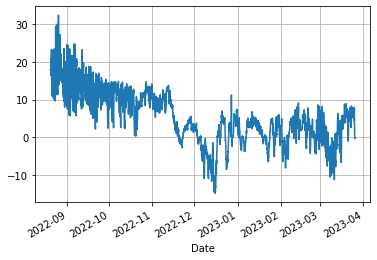

In [36]:
temp_data.plot(grid=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_13084\527033553.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2022=df['2022']


<AxesSubplot:xlabel='Date'>

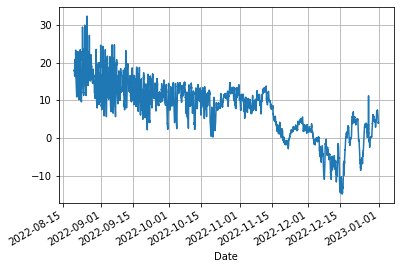

In [38]:
df_2022=df['2022']
temp_data_2022=df_2022['Temperature']
temp_data_2022.plot(grid=True)

In [39]:
import plotly.express as px
fig= px.line(df_copy,x='Date',y='Temperature',title='Temperature with slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [42]:
df['2022':'2023']['Temperature'].describe()

C:\Users\ACER\AppData\Local\Temp\ipykernel_13084\1748829319.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



count    29615.000000
mean         4.995911
std          6.604632
min        -14.800000
25%          0.400000
50%          4.400000
75%         10.000000
max         32.300000
Name: Temperature, dtype: float64

In [45]:
df


FCnt  SpFact  RSSI  SNR  Gateway  \
Date                                                    
2022-08-20 02:03:26  3743      10  -114 -1.0     1105   
2022-08-20 02:13:26  3744      10  -110 -8.0      146   
2022-08-20 02:23:26  3745      10  -113  1.0     1105   
2022-08-20 02:33:26  3746      10  -113 -2.2      146   
2022-08-20 02:53:27  3748      10  -113 -1.0     1105   
...                   ...     ...   ...  ...      ...   
2023-03-25 23:44:43  4128       7  -114  1.0     1105   
2023-03-25 23:54:43  4129       7  -111  2.2      146   
2023-03-26 00:04:43  4130       7  -113  0.0     1105   
2023-03-26 00:14:43  4131       7  -114  0.0     1105   
2023-03-26 00:24:43  4132       7  -105 -8.0     1105   

                                        Payload (Hex)  AccMotion  AccX  AccY  \
Date                                                                           
2022-08-20 02:03:26  0100b30251070e300c00c214000f61e4        NaN   NaN   NaN   
2022-08-20 02:13:26  0100b30251070e300c00c214000f6181        NaN   NaN   NaN   
2022-08-20 02:23:26  0100b30251070e2d0c00c114000f6105        NaN   NaN   NaN   
2022-08-20 02:33:26  0100b20251070e300c00c114000f614d        NaN   NaN   NaN   
2022-08-20 02:53:27  0100b40251070e2d0c00c114000f60c0        NaN   NaN   NaN   
...                                               ...        ...   ...   ...   
2023-03-25 23:44:43  01fffe025c070e1b0c000014000f2869        NaN   NaN   NaN   
2023-03-25 23:54:43  01fffe025c070e1d0c000014000f28bf        NaN   NaN   NaN   
2023-03-26 00:04:43  01fffe025c070e1d0c000014000f286e        NaN   NaN   NaN   
2023-03-26 00:14:43  01fffd025c070e1b0c000014000f28ce        NaN   NaN   NaN   
2023-03-26 00:24:43  01fffe025c070e1b0c000014000f28c5        NaN   NaN   NaN   

                     AccZ  ...  Occupancy  Pressure  Pulse1  Pulse1Abs  \
Date                       ...                                           
2022-08-20 02:03:26   NaN  ...        NaN  1008.100     NaN        NaN   
2022-08-20 02:13:26   NaN  ...        NaN  1008.001     NaN        NaN   
2022-08-20 02:23:26   NaN  ...        NaN  1007.877     NaN        NaN   
2022-08-20 02:33:26   NaN  ...        NaN  1007.949     NaN        NaN   
2022-08-20 02:53:27   NaN  ...        NaN  1007.808     NaN        NaN   
...                   ...  ...        ...       ...     ...        ...   
2023-03-25 23:44:43   NaN  ...        NaN   993.385     NaN        NaN   
2023-03-25 23:54:43   NaN  ...        NaN   993.471     NaN        NaN   
2023-03-26 00:04:43   NaN  ...        NaN   993.390     NaN        NaN   
2023-03-26 00:14:43   NaN  ...        NaN   993.486     NaN        NaN   
2023-03-26 00:24:43   NaN  ...        NaN   993.477     NaN        NaN   

                     SoundAvg  SoundPeak  Temperature     Vdd  Waterleak  \
Date                                                                       
2022-08-20 02:03:26       NaN        NaN         17.9  3632.0        NaN   
2022-08-20 02:13:26       NaN        NaN         17.9  3632.0        NaN   
2022-08-20 02:23:26       NaN        NaN         17.9  3629.0        NaN   
2022-08-20 02:33:26       NaN        NaN         17.8  3632.0        NaN   
2022-08-20 02:53:27       NaN        NaN         18.0  3629.0        NaN   
...                       ...        ...          ...     ...        ...   
2023-03-25 23:44:43       NaN        NaN         -0.2  3611.0        NaN   
2023-03-25 23:54:43       NaN        NaN         -0.2  3613.0        NaN   
2023-03-26 00:04:43       NaN        NaN         -0.2  3613.0        NaN   
2023-03-26 00:14:43       NaN        NaN         -0.3  3611.0        NaN   
2023-03-26 00:24:43       NaN        NaN         -0.2  3611.0        NaN   

                     Events  
Date                         
2022-08-20 02:03:26     NaN  
2022-08-20 02:13:26     NaN  
2022-08-20 02:23:26     NaN  
2022-08-20 02:33:26     NaN  
2022-08-20 02:53:27     NaN  
...                     ...  
2023-03-25 23:44:43     NaN  
2023-03-25 23:54

In [53]:
df_2022_new=df['2022']

C:\Users\ACER\AppData\Local\Temp\ipykernel_13084\1806307905.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



In [54]:
pressure_2022=df_2022_new[['Temperature','Pressure']]

In [56]:
pressure_2022

Temperature  Pressure
Date                                      
2022-08-20 02:03:26         17.9  1008.100
2022-08-20 02:13:26         17.9  1008.001
2022-08-20 02:23:26         17.9  1007.877
2022-08-20 02:33:26         17.8  1007.949
2022-08-20 02:53:27         18.0  1007.808
...                          ...       ...
2022-12-31 22:57:40          4.1   995.414
2022-12-31 23:27:40          4.2   995.586
2022-12-31 23:37:40          4.2   995.459
2022-12-31 23:47:40          4.2   995.436
2022-12-31 23:57:40          4.1   995.408

[18066 rows x 2 columns]

array([[<AxesSubplot:title={'center':'Pressure'}>,
        <AxesSubplot:title={'center':'Temperature'}>]], dtype=object)

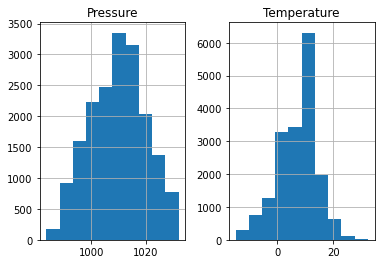

In [58]:
df_2022_new[['Pressure','Temperature']].hist()

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

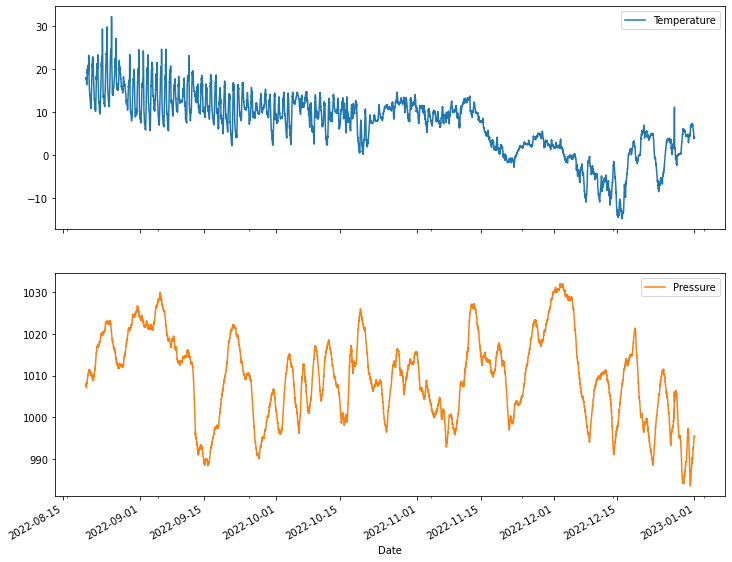

In [88]:
pressure_2022.plot(subplots=True)

<AxesSubplot:ylabel='Density'>

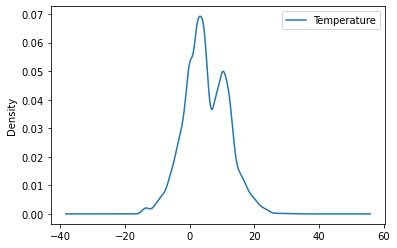

In [65]:
df[['Temperature']].plot(kind='density')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

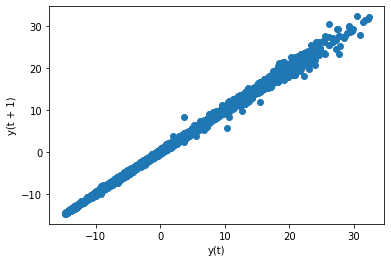

In [66]:
pd.plotting.lag_plot(df['Temperature'],lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 10)'>

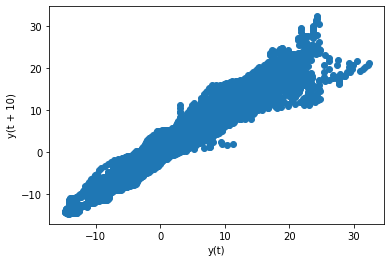

In [67]:
pd.plotting.lag_plot(df['Temperature'],lag=10)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 24)'>

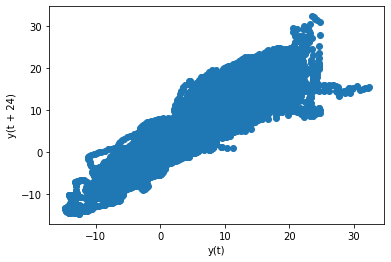

In [69]:
pd.plotting.lag_plot(df['Temperature'],lag=24)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 8640)'>

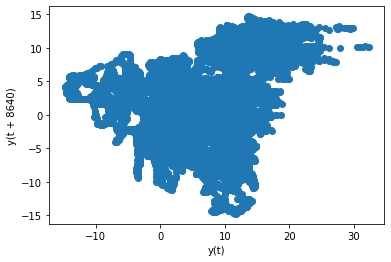

In [68]:
pd.plotting.lag_plot(df['Temperature'],lag=8640)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2150)'>

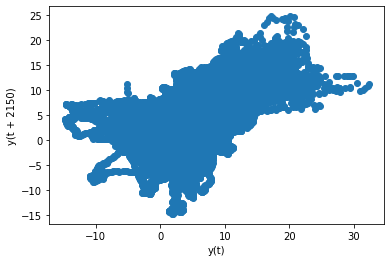

In [70]:
pd.plotting.lag_plot(df['Temperature'],lag=2150)

In [89]:
multi_data=df[['Temperature','Pressure','Humidity','ExternalTemp1']]

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

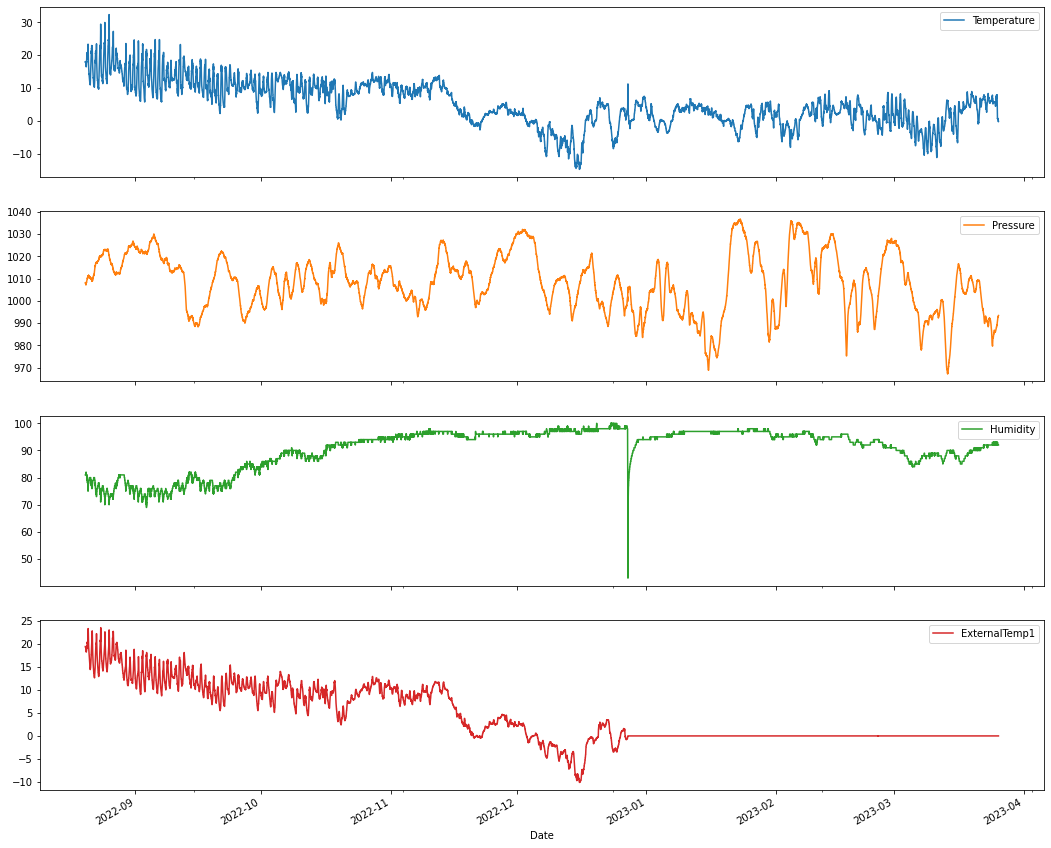

In [92]:
multi_data.plot(subplots=True)


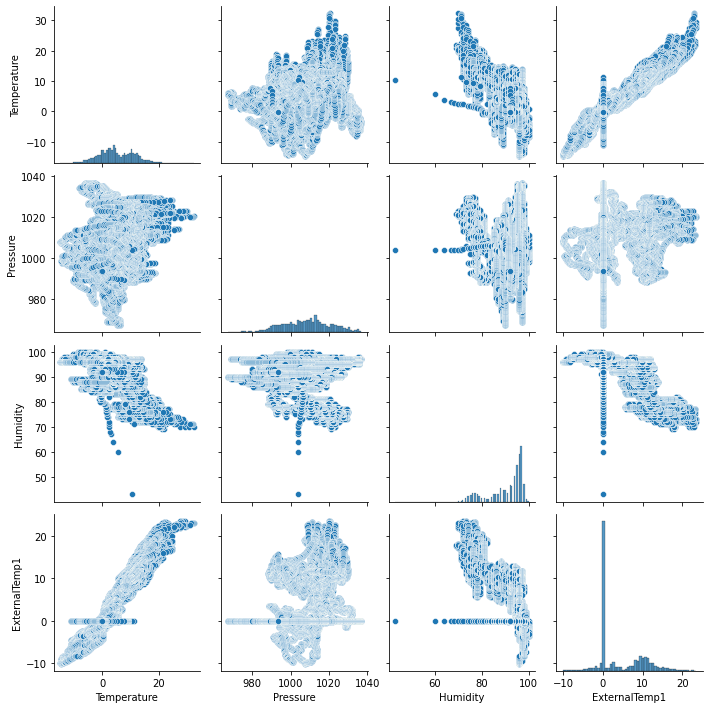

In [96]:
g= sns.pairplot(df_copy[['Temperature','Pressure','Humidity','ExternalTemp1']])

In [97]:
df_CORR=df_copy[['Temperature','Pressure','Humidity','ExternalTemp1']].corr(method='pearson')

In [98]:
df_CORR

Temperature  Pressure  Humidity  ExternalTemp1
Temperature       1.000000  0.079182 -0.612480       0.904231
Pressure          0.079182  1.000000 -0.106704       0.166729
Humidity         -0.612480 -0.106704  1.000000      -0.700014
ExternalTemp1     0.904231  0.166729 -0.700014       1.000000

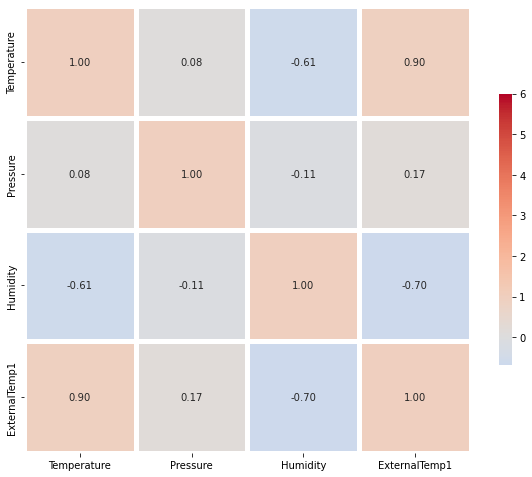

In [101]:
g=sns.heatmap(df_CORR,vmax=6,center=0,square=True,linewidths=5,cbar_kws={"shrink":.5},annot=True,fmt='.2f',cmap='coolwarm')
g.figure.set_size_inches(10,10)
plt.show()